<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter8FocalImaging/CoherenceFocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coherence and focal imaging



## David Brady
## University of Arizona

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.decomposition import PCA
from scipy.interpolate import BSpline
from scipy.integrate import quad
from scipy.signal import resample
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams['font.size']= 22

## Mutual intensity and coherent mode decomposition of point sources.

The mutual intensity of a single point source sampled by a 1D apeture on the Shannon basis is
$$J_{nm}=I{\rm sinc}(x-n){\rm sinc}(x-n)$$

Here we consider coherent modes of the mutual intensity matrix for several point source distributions.

In [ ]:
def J(d):
  J=np.zeros((64,64))
  for m in range(64):
    for n in range(64):
      J[m,n]=np.sinc(m-32+d)*np.sinc(n-32 +d)

  return J

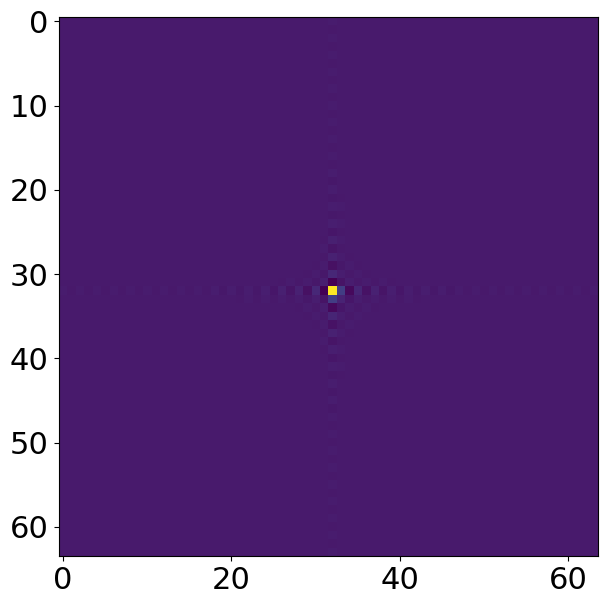

In [ ]:
plt.imshow(J(0)+J(-0.2))

In [ ]:
u,s,v=np.linalg.svd(J(0))

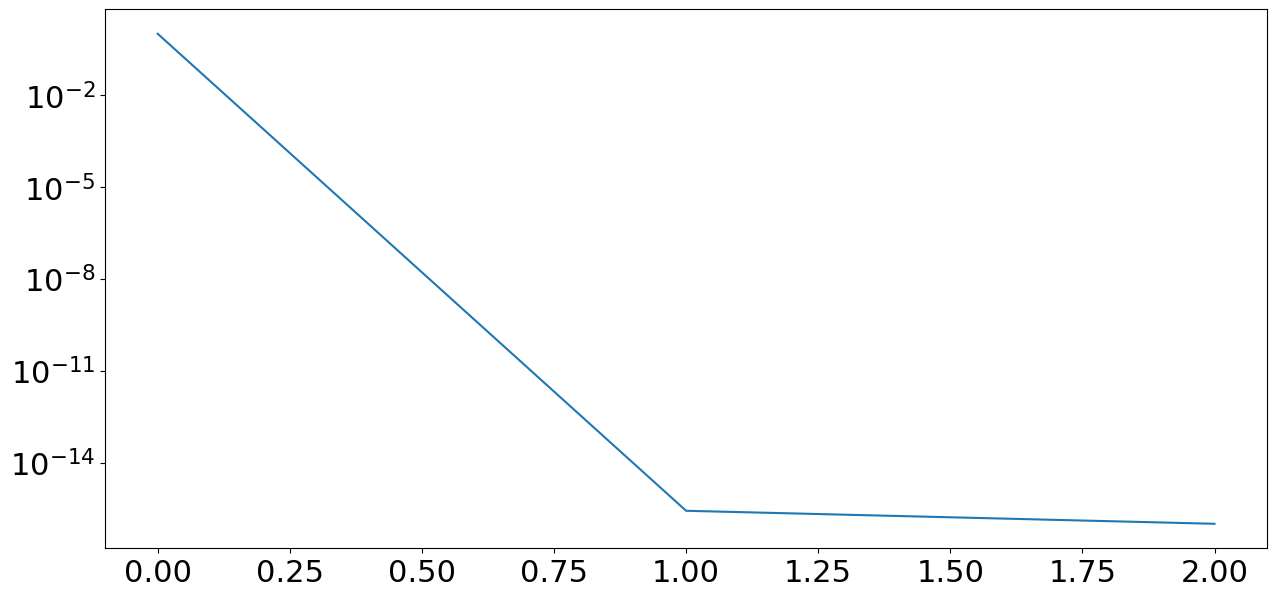

In [ ]:
plt.semilogy(s[0:3])

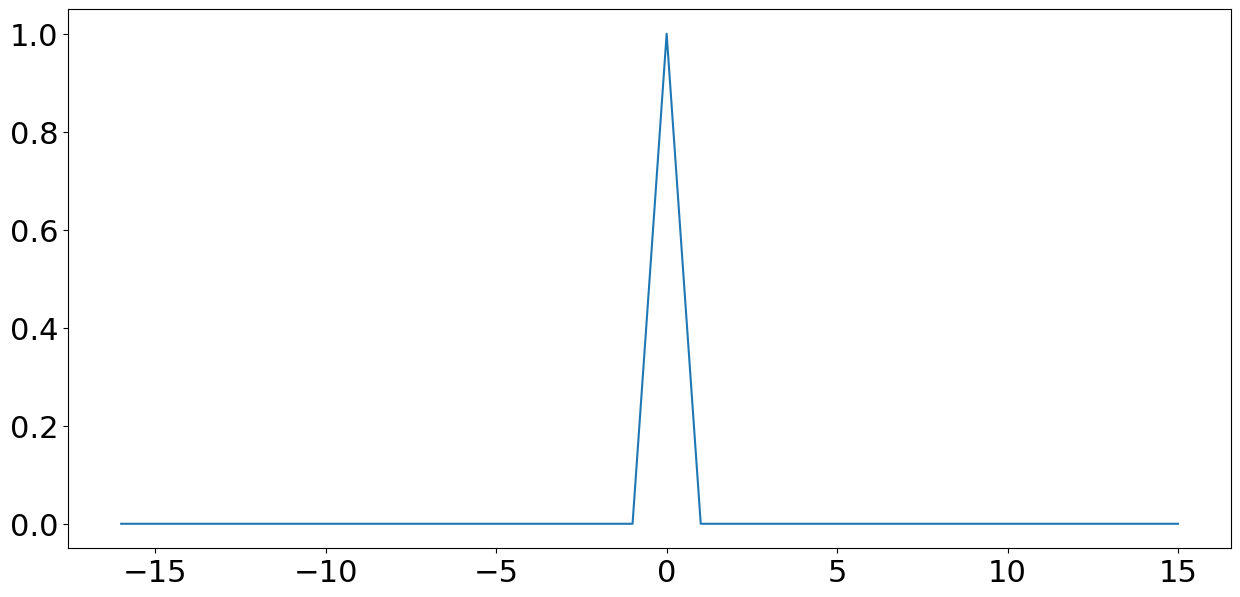

In [ ]:
plt.plot(range(-16,16),v[0,16:48])

### plot the second singular value as a function of separation for separation from .001 to .04

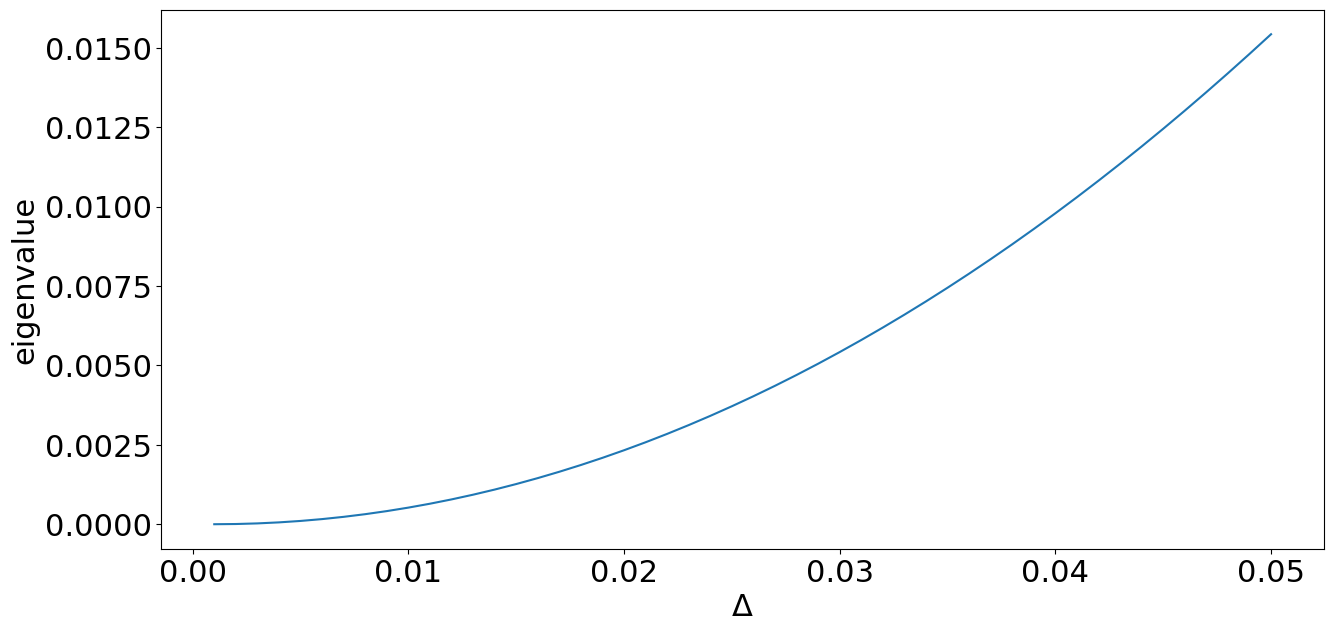

In [ ]:
lam=np.zeros(50)
for pip in range(50):
  d=pip*.001
  u,s,v=np.linalg.svd(J(d)+J(-d))
  lam[pip]=s[1]
plt.plot(np.linspace(0.001,0.05,50),lam)
plt.xlabel(r'$\Delta$')
plt.ylabel('eigenvalue')
plt.savefig('eigenvalueVDelta.pdf')

### various example separations

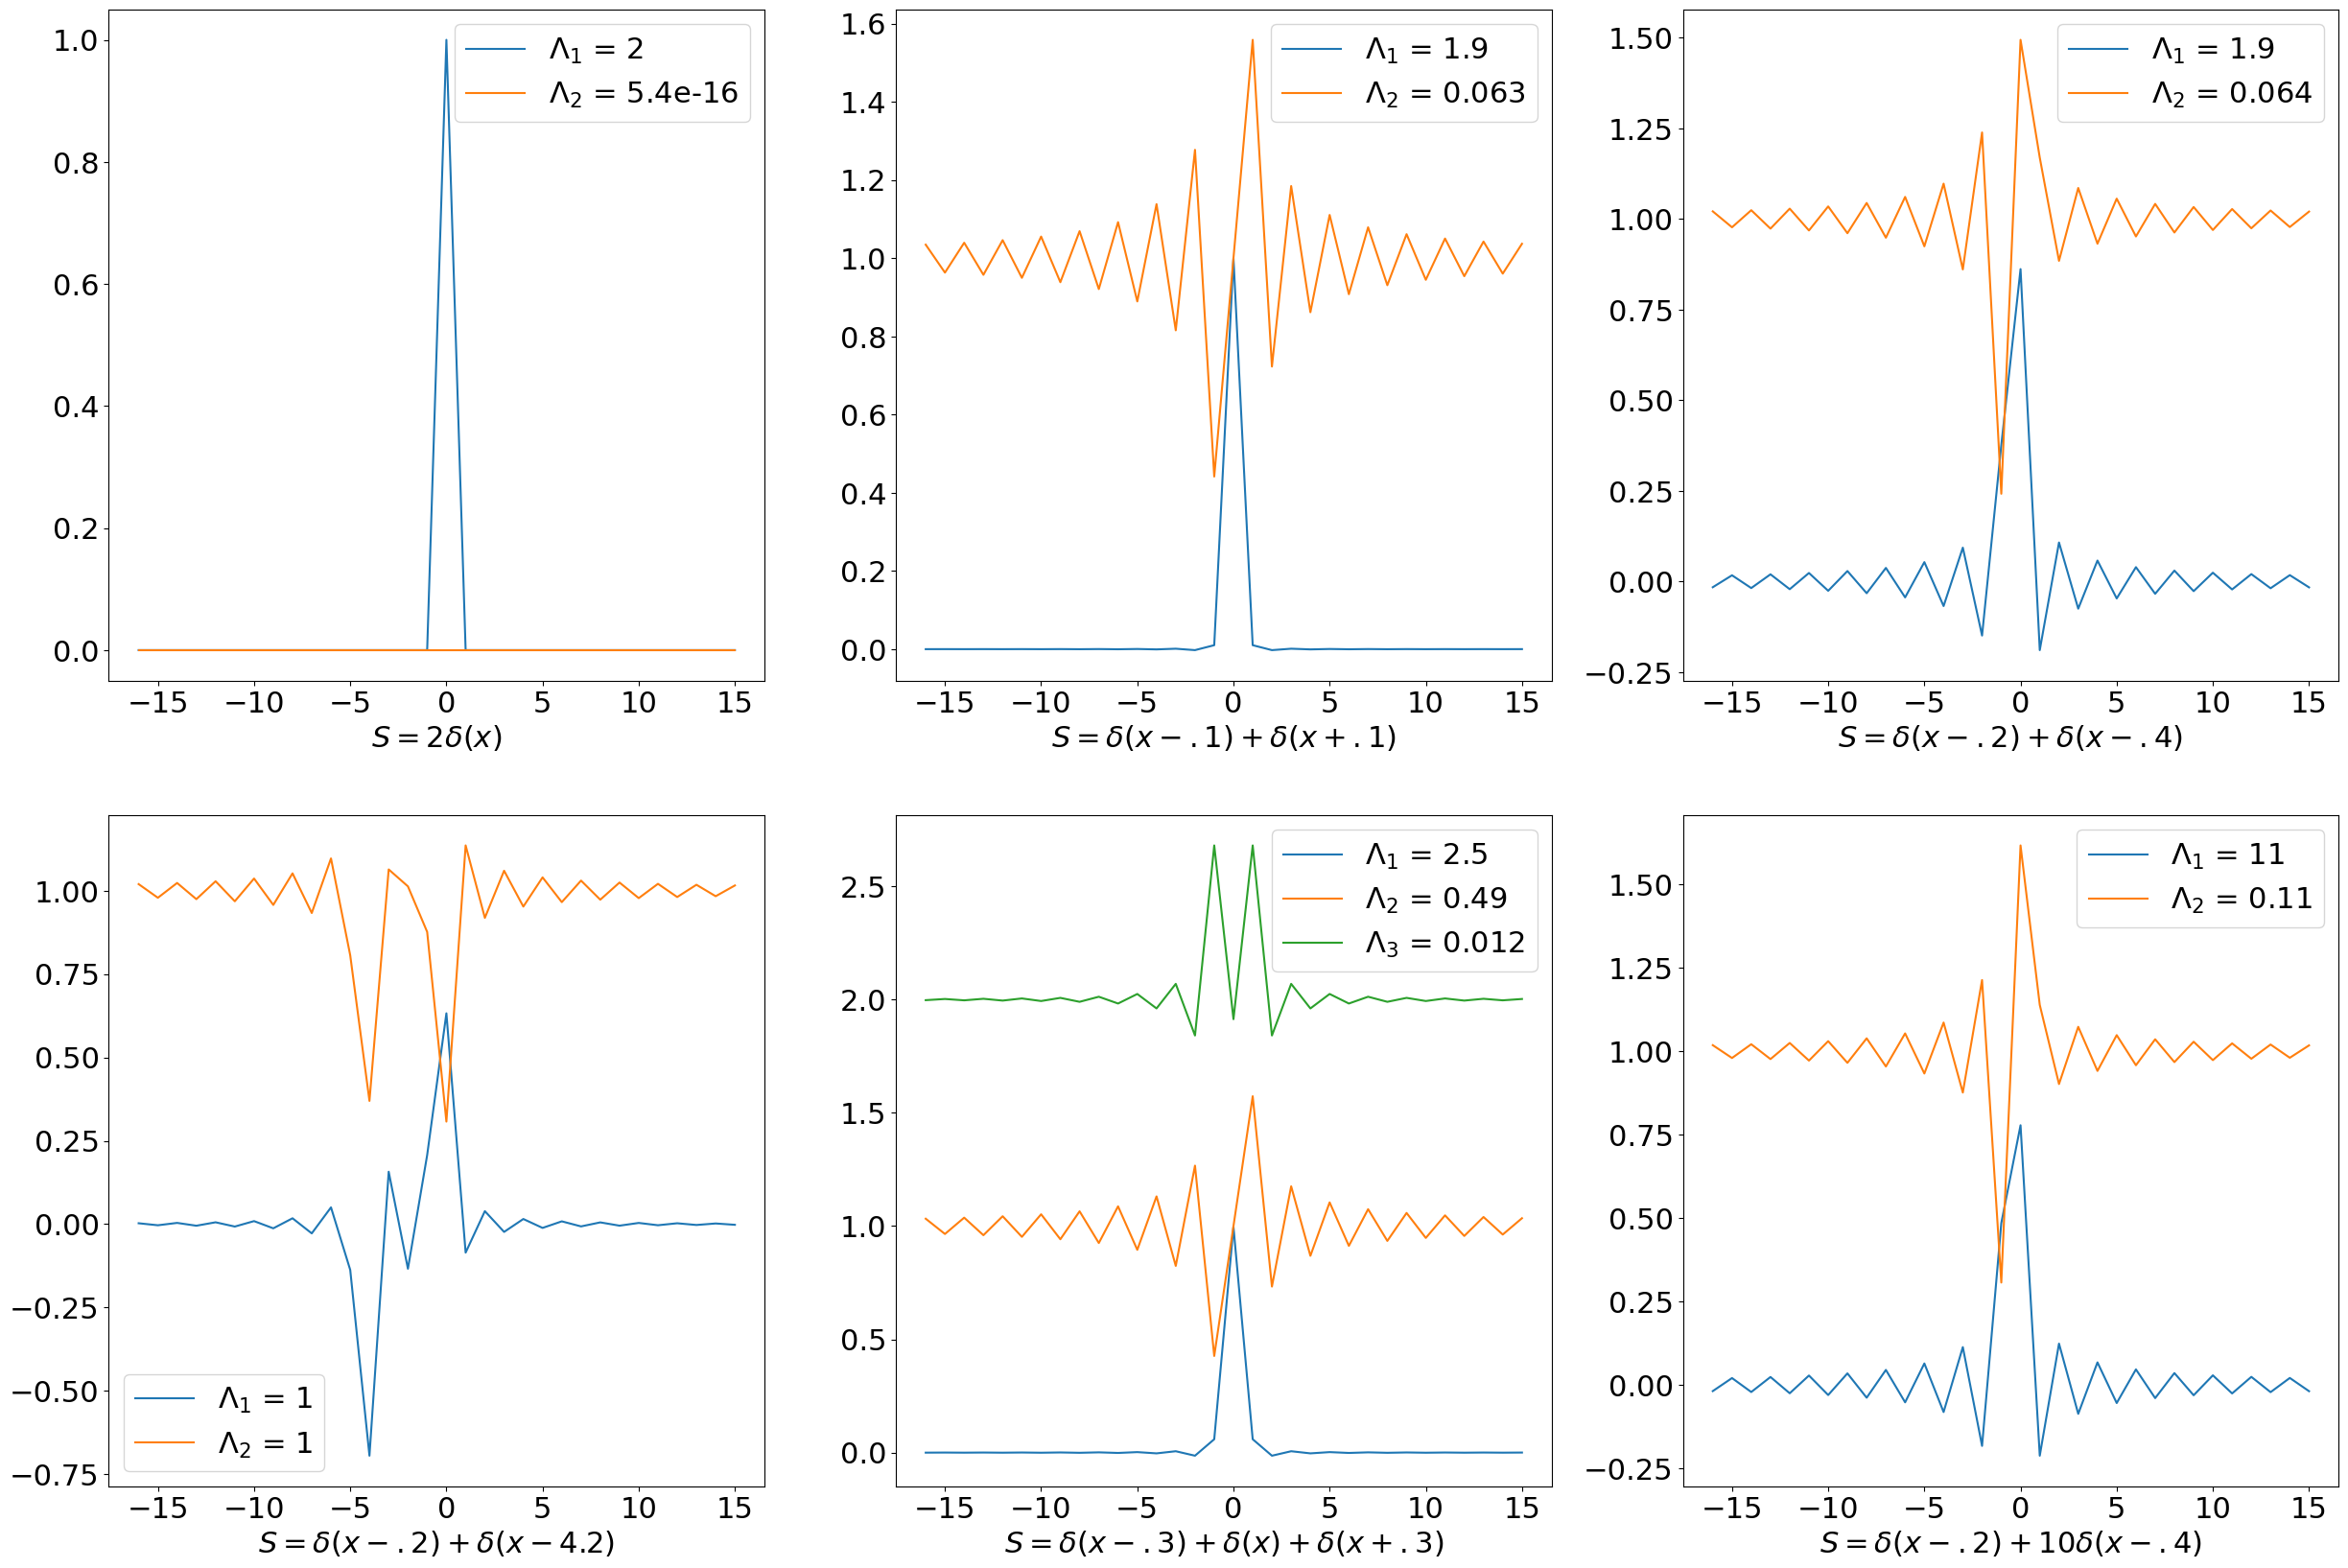

In [ ]:
plt.figure(figsize=(30,20))
#delta = 0
# delta1 = 0.2 , delta2 = -.2
#delta1 =.2 delta2 = .4
#delta1 =.2 delta2 = .4 second intensity is 2x first intensity
# delta1 =.2, delta2 =4
u,s,v=np.linalg.svd(J(0)+J(0))
plt.subplot(2,3,1)
plt.plot(range(-16,16),v[0,16:48],label=r'$\Lambda_1$ = {:.2g}'.format(s[0]))
plt.plot(range(-16,16),v[1,16:48], label=r'$\Lambda_2$ = {:.2g}'.format(s[1]))
plt.xlabel(r'$S=2\delta(x)$')
plt.legend()
u,s,v=np.linalg.svd(J(0.1)+J(-0.1))
plt.subplot(2,3,2)
plt.plot(range(-16,16),v[0,16:48],label=r'$\Lambda_1$ = {:.2g}'.format(s[0]))
plt.plot(range(-16,16),v[1,16:48]+1, label=r'$\Lambda_2$ = {:.2g}'.format(s[1]))
plt.xlabel(r'$S=\delta(x-.1)+\delta(x+.1)$')
plt.legend()
u,s,v=np.linalg.svd(J(.2)+J(0.4))
plt.subplot(2,3,3)
plt.plot(range(-16,16),v[0,16:48],label=r'$\Lambda_1$ = {:.2g}'.format(s[0]))
plt.plot(range(-16,16),v[1,16:48]+1, label=r'$\Lambda_2$ = {:.2g}'.format(s[1]))
plt.xlabel(r'$S=\delta(x-.2)+\delta(x-.4)$')
plt.legend()
u,s,v=np.linalg.svd(J(.2)+J(4.2))
plt.subplot(2,3,4)
plt.plot(range(-16,16),v[0,16:48],label=r'$\Lambda_1$ = {:.2g}'.format(s[0]))
plt.plot(range(-16,16),v[1,16:48]+1, label=r'$\Lambda_2$ = {:.2g}'.format(s[1]))
plt.xlabel(r'$S=\delta(x-.2)+\delta(x-4.2)$')
plt.legend()
u,s,v=np.linalg.svd(J(.3)+J(0)+J(-.3))
plt.subplot(2,3,5)
plt.plot(range(-16,16),v[0,16:48],label=r'$\Lambda_1$ = {:.2g}'.format(s[0]))
plt.plot(range(-16,16),v[1,16:48]+1, label=r'$\Lambda_2$ = {:.2g}'.format(s[1]))
plt.plot(range(-16,16),v[2,16:48]+2, label=r'$\Lambda_3$ = {:.2g}'.format(s[2]))
plt.xlabel(r'$S=\delta(x-.3)+\delta(x)+\delta(x+.3)$')
plt.legend()
u,s,v=np.linalg.svd(J(.2)+10*J(.4))
plt.subplot(2,3,6)
plt.plot(range(-16,16),v[0,16:48],label=r'$\Lambda_1$ = {:.2g}'.format(s[0]))
plt.plot(range(-16,16),v[1,16:48]+1, label=r'$\Lambda_2$ = {:.2g}'.format(s[1]))
plt.xlabel(r'$S=\delta(x-.2)+10\delta(x-.4)$')
plt.legend()
plt.savefig('2pointModes.pdf')

## Mutual coherence of harmonic sources

We consider the remote incoherent source
$$
S(x)=(1+\cos (2\pi u x))e^{-\frac{x^2}{2X^2}}
$$
The mutual intensity for this source requires evaluation of the integral
$$
J(x_1,x_2)=\int_{-\frac{X}{2}}^{\frac{X}{2}}\cos (2\pi u x)e^{-\frac{x^2}{2X^2}}{\rm sinc}(x-n \Delta){\rm sinc}(x-m \Delta)dx
$$

In [ ]:
# prompt: make function to integrate cos(2 pi u x) sinc(x- n) sinc(x-m)  over x

def integrate_cos_sinc(u, n, m):
  def integrand(x):
    return (1+np.cos(2 * np.pi * u * x))*np.exp(-x**2/(2*25**2))* np.sinc(x - n) * np.sinc(x - m)
  result=0
  for pop in range(n-50,n+50):
    r, _ = quad(integrand, pop, pop+1)
    result+=r
  return result



In [ ]:
J=np.zeros((80,80))
for m in range(80):
  for n in range(80):
    J[m,n]=integrate_cos_sinc(.7,m-40,n-40)

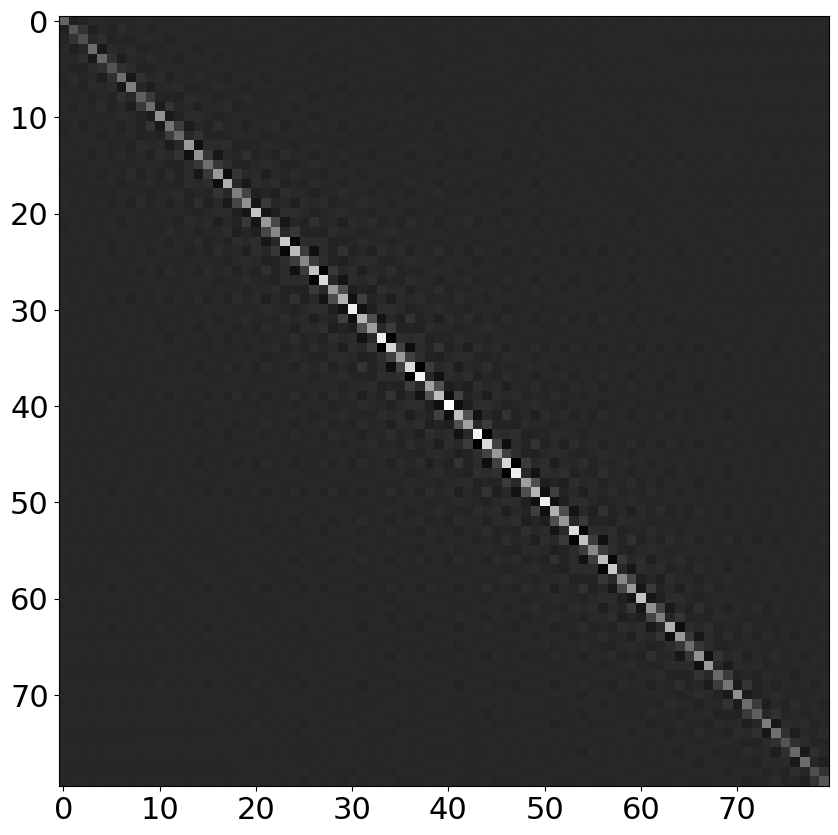

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(J, cmap='gray')

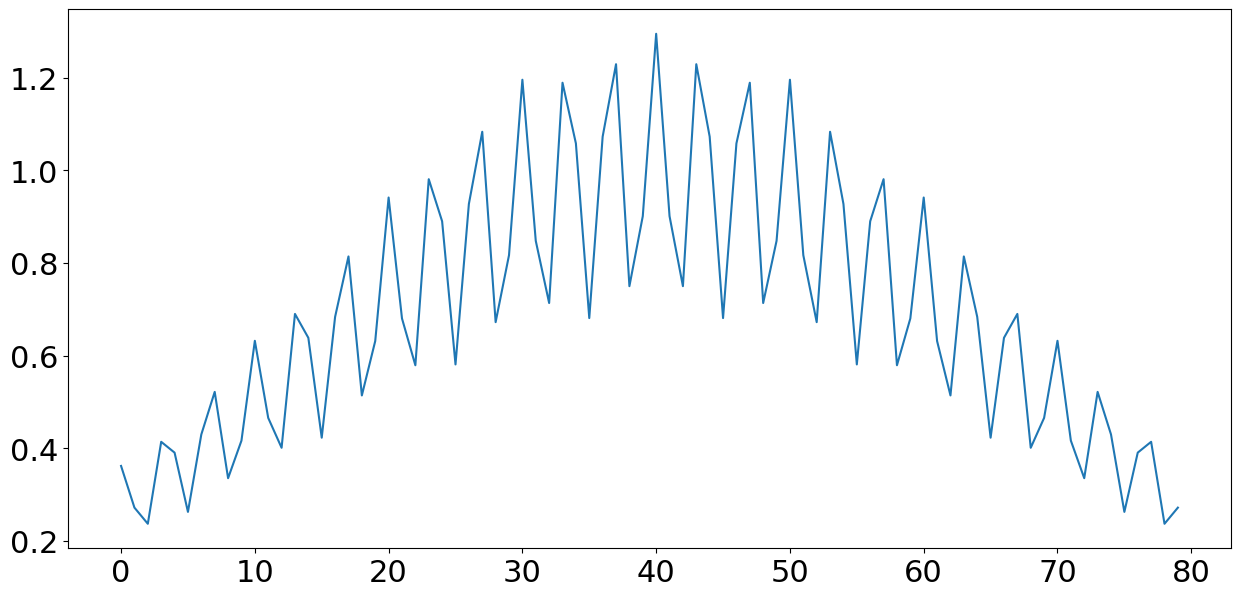

In [ ]:
plt.plot(np.diag(J))

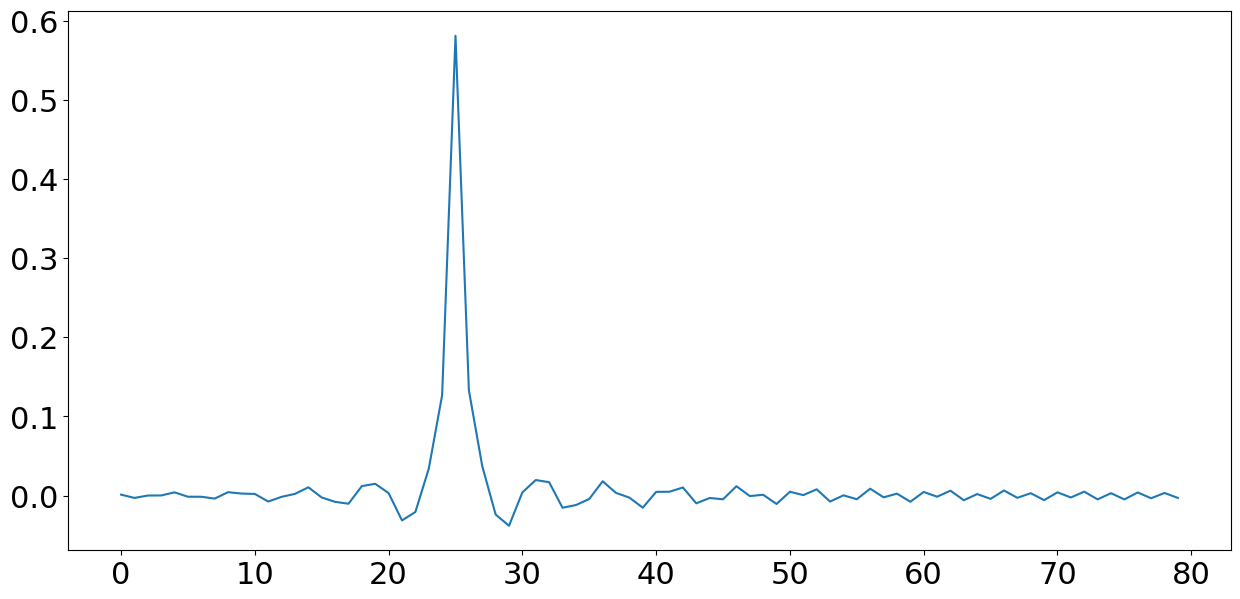

In [ ]:
plt.plot(J[25,:])

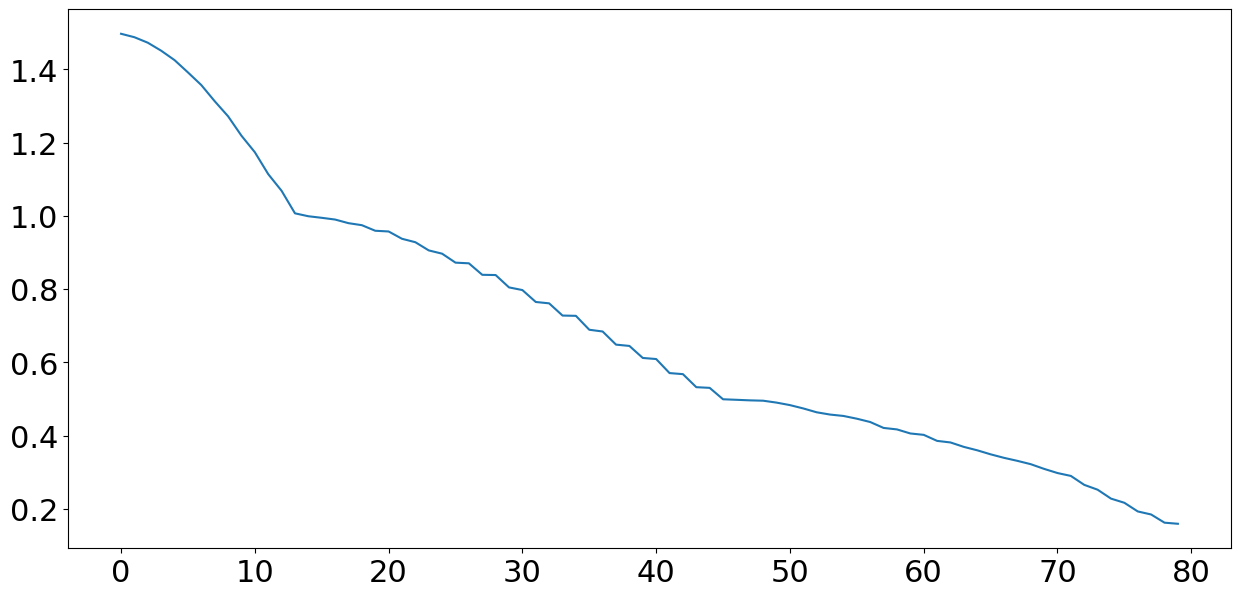

In [ ]:
u,s,v=np.linalg.svd(J)
plt.plot(s)

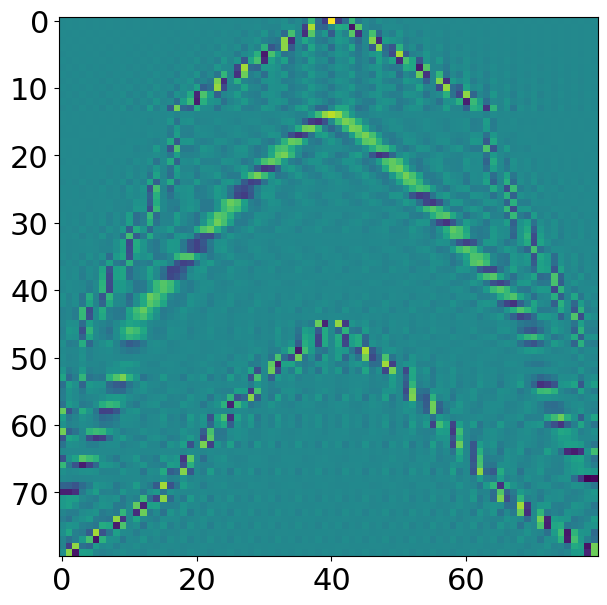

In [ ]:
plt.imshow(v)

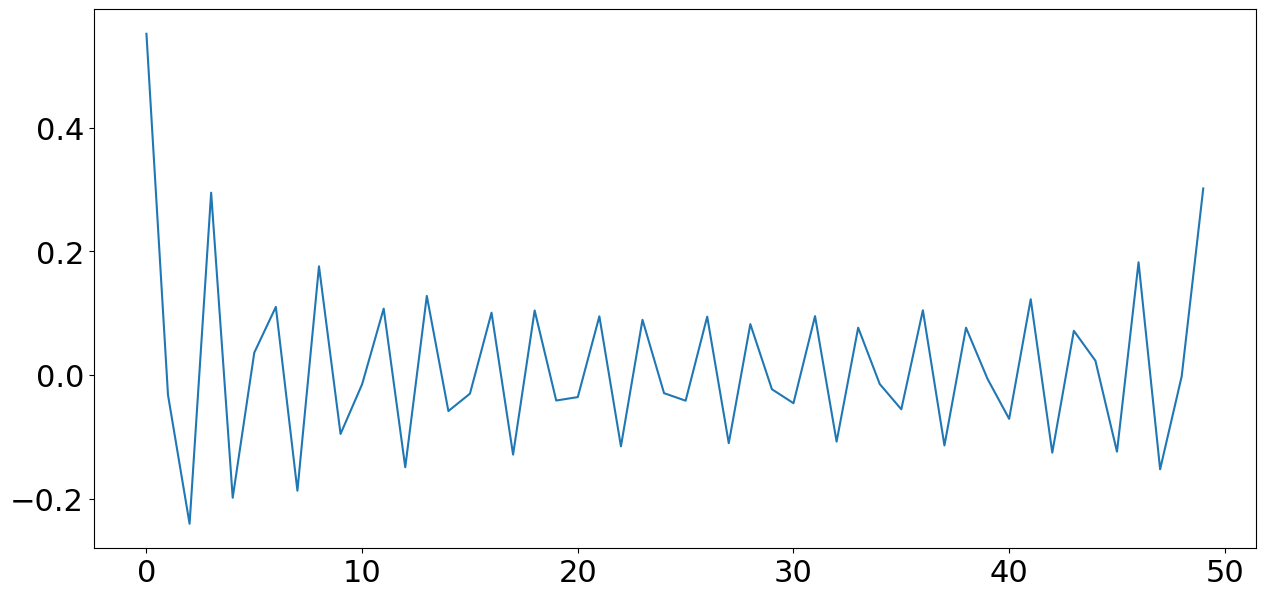

In [ ]:
plt.plot(v[5,:])


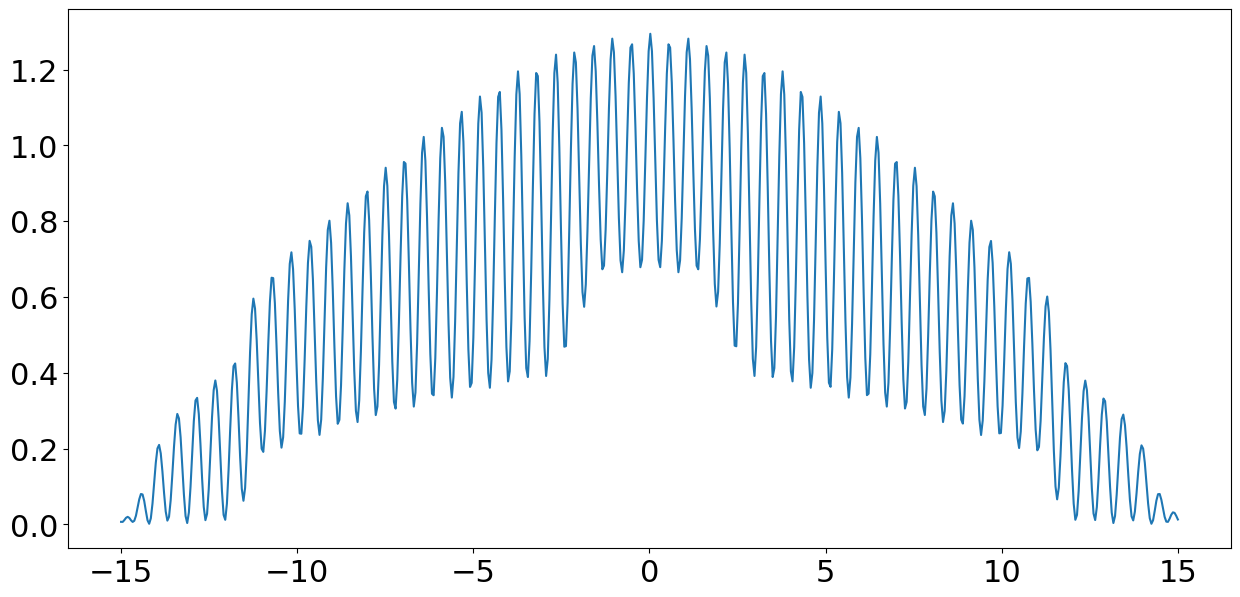

In [ ]:
a=np.abs(resample(v[0,:],8*len(v[0:]))**2)*s[0]
for pip in range(1,50):
  a+=np.abs(resample(v[pip,:],8*len(v[pip,:]))**2)*s[pip]
plt.plot(np.linspace(-15,15,8*len(v[0,:])),a)

## Mutual coherence of distributed incoherent sources.



Let $S(x)=\sum_n S_n \phi(x- n \frac{\Delta}{2} )$. We consider the coherence function
$$J_{nm}=\int S(x) {\rm sinc}(x-n \Delta){\rm sinc}(x-m \Delta)dx$$
or
$$J_{nm}=\sum_l S_l \gamma_{lmn}$$
where
$\gamma_{lmn}=\int \phi(x- l \frac{\Delta}{2} ){\rm sinc}(x-n \Delta){\rm sinc}(x-m \Delta)dx$



In [ ]:
# prompt: define a normal distribution function h(x)


def h(x, mu=0, sigma=1):
  """Normal distribution function.

  Args:
    x: The input value.
    mu: The mean of the distribution.
    sigma: The standard deviation of the distribution.

  Returns:
    The probability density function value at x.
  """
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


In [ ]:
def w(m, n, d):
  def integrand(x):
    return h(x,mu=d,sigma=.5) * np.sinc(x - m) * np.sinc(x - n)
  integral, error = integrate.quad(integrand, -20, 20)
  return integral

In [ ]:
W=np.zeros((16,32,32))
for l in range(16):
  for m in range(32):
    for n in range(32):
      W[l,m,n]=w(m-16,n-16,(l-8)*.5)

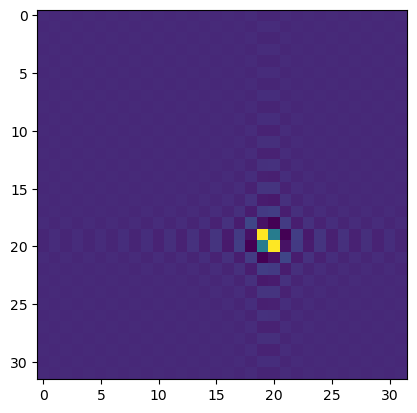

In [ ]:
plt.imshow(W[15,:,:])

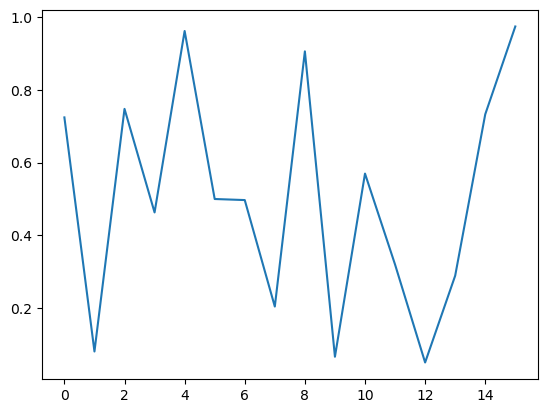

In [ ]:
weights=np.random.random(16)
plt.plot(weights)

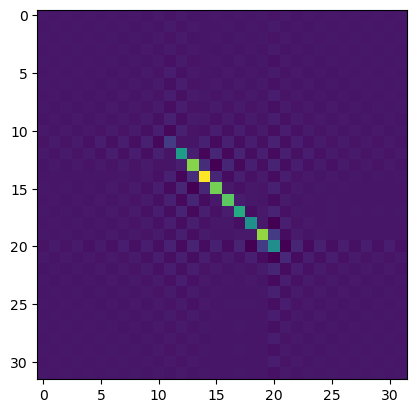

In [ ]:
Wr=np.sum(weights[:,None,None]*W,axis=0)
plt.imshow(Wr)

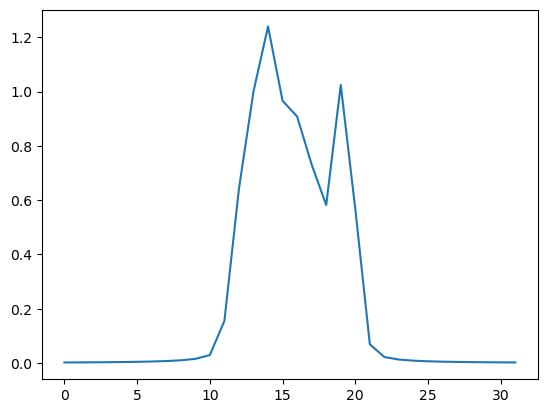

In [ ]:
plt.plot(np.diag(Wr))

In [ ]:
u,s,v=np.linalg.svd(Wr)

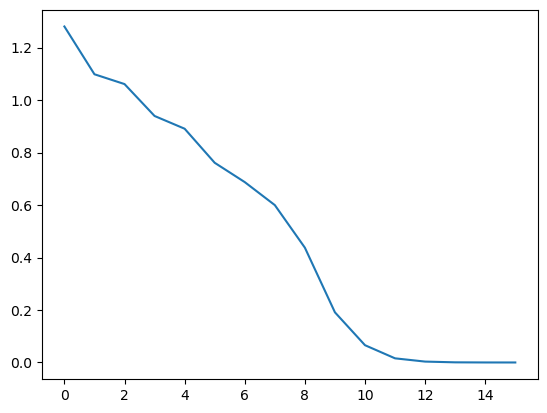

In [ ]:
plt.plot(s[0:16])

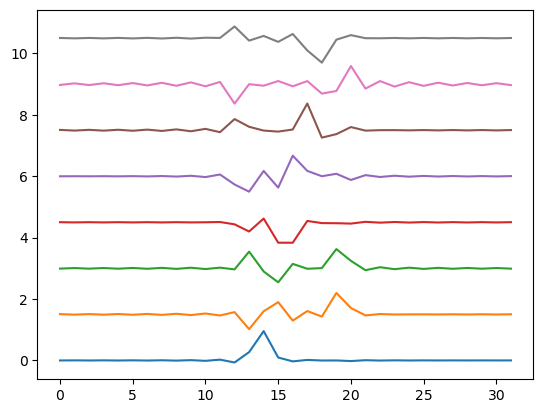

In [ ]:
for pip in range(8):
  plt.plot(v[pip,:]+1.5*pip)

Sample 256 signals either by trace or by full w, evalutate pca of measurements

In [ ]:
gDiag=np.zeros((256,32))
gW=np.zeros((256,1024))
for pip in range(256):
  weights=np.random.random(16)
  Wr=np.sum(weights[:,None,None]*W,axis=0)
  gDiag[pip,:]=np.diag(Wr)
  gW[pip,:]=Wr.flatten()

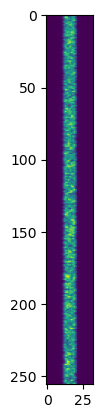

In [ ]:
plt.imshow(gDiag)

In [ ]:
pcaDiag=PCA(n_components=32)
pcaDiag.fit(np.transpose(gDiag))

PCA(n_components=32)

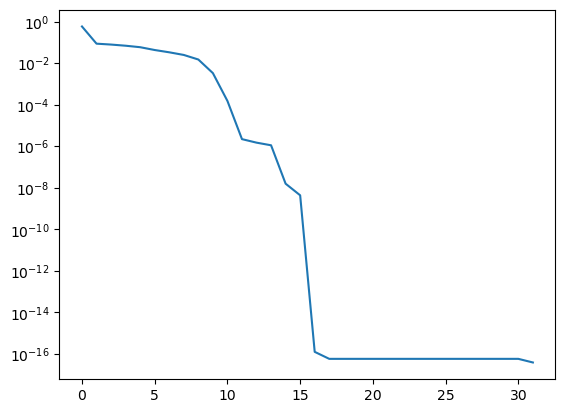

In [ ]:
plt.semilogy(pcaDiag.singular_values_/np.sum(pcaDiag.singular_values_))

In [ ]:
pcaW=PCA(n_components=32)
pcaW.fit(np.transpose(gW))

PCA(n_components=32)

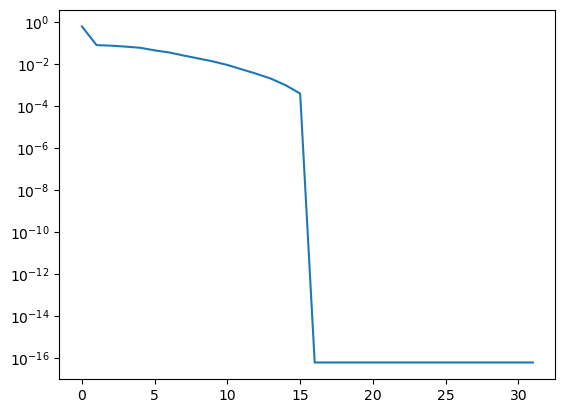

In [ ]:
plt.semilogy(pcaW.singular_values_/np.sum(pcaW.singular_values_))

## Fourier sampling

The mutual coherence
$$J(x_1,x_2)=\int S(x) {\rm sinc}(x-x_1){\rm sinc}(x-x_2)$$

samples the spatial spectrum
$${\hat J}(u_1,u_2)={\hat S}(u_1-u_2) {\rm rect}(u_1){\rm rect}(u_2)$$
here we visualize $u_1-u_2$ over the $u_1$, $u_2$ plane.


<ipython-input-5-7c89641d17dc>:18: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(U, V, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)


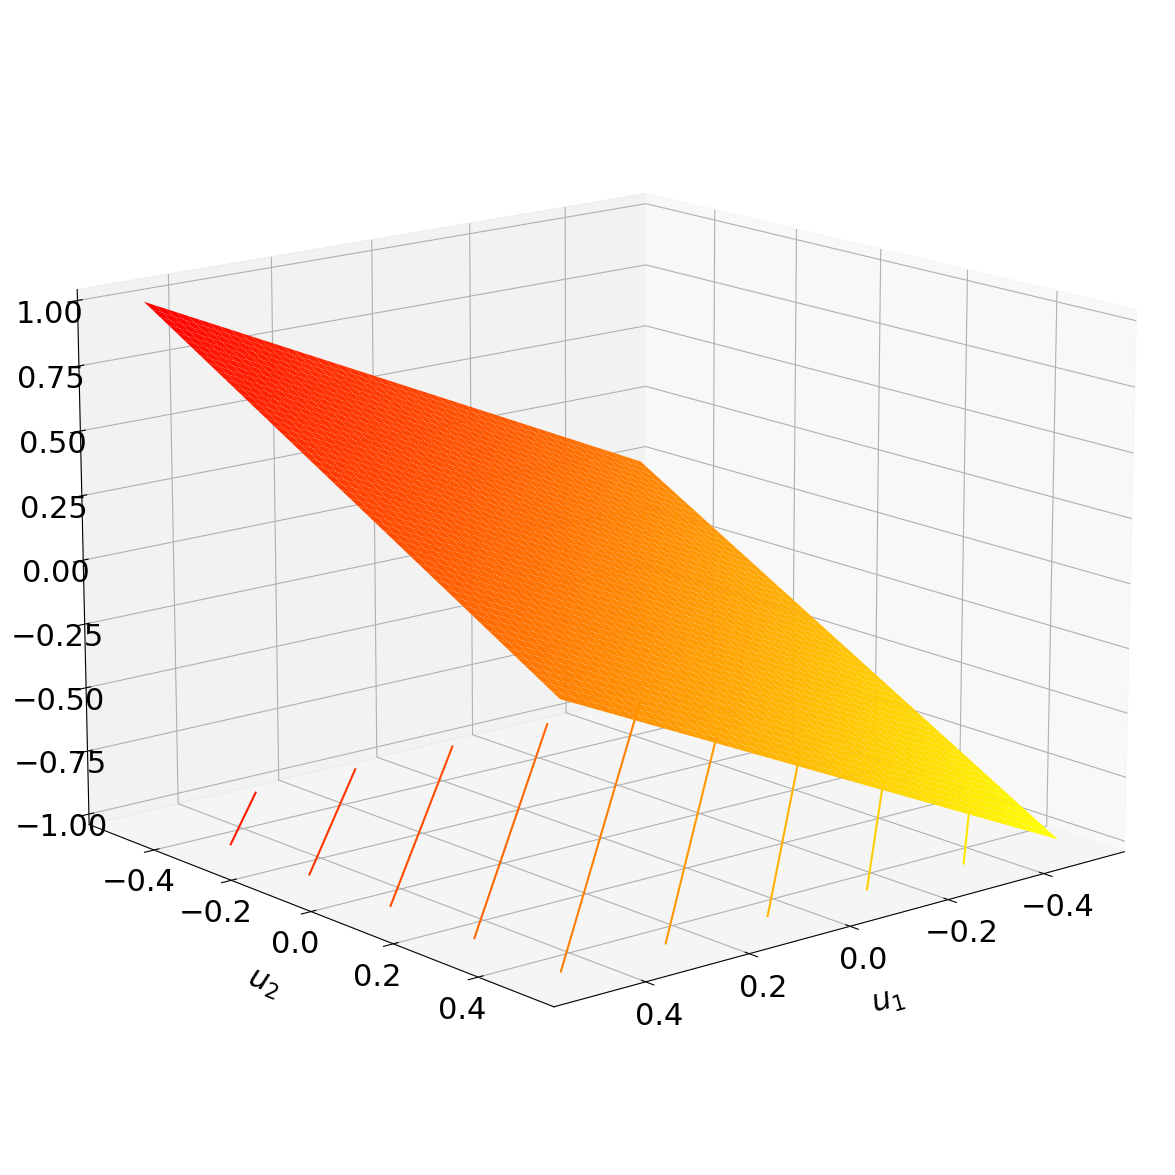

In [ ]:
# prompt: make a 3d surface plot of u -v over the plane with u going from -.5 to .5 and v going from -.5 to .5


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def surface_function(u, v):
    return u - v

u = np.linspace(-0.5, 0.5, 50)
v = np.linspace(-0.5, 0.5, 50)
U, V = np.meshgrid(u, v)
Z = surface_function(U, V)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U, V, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour(U, V, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.view_init(elev=15, azim=50, roll=0)
ax.set_xlabel('\n\n'+r'$u_1$')
ax.set_ylabel('\n\n'+r'$u_2$')
plt.savefig('Juv.pdf')


In [3]:
# prompt: make a 3d surface plot of u -v over the plane with u going from -.5 to .5 and v going from -.5 to .5


def r(x):
  if np.abs(x)<.5:
    return 1
  else:
    return 0
rect=np.vectorize(r)

def convolve_rects(a, b, x_values):
    """
    Compute the convolution of two rect functions centered at zero with widths a and b.

    Parameters:
    - a: Width of the first rect function.
    - b: Width of the second rect function.
    - x_values: Array of x values where the convolution is evaluated.

    Returns:
    - h_values: The convolution evaluated at x_values.
    """
    # Compute the overlap at each x
    left = np.maximum(-a/2, x_values - b/2)
    right = np.minimum(a/2, x_values + b/2)
    overlap = right - left
    h_values = np.maximum(0, overlap)
    return h_values


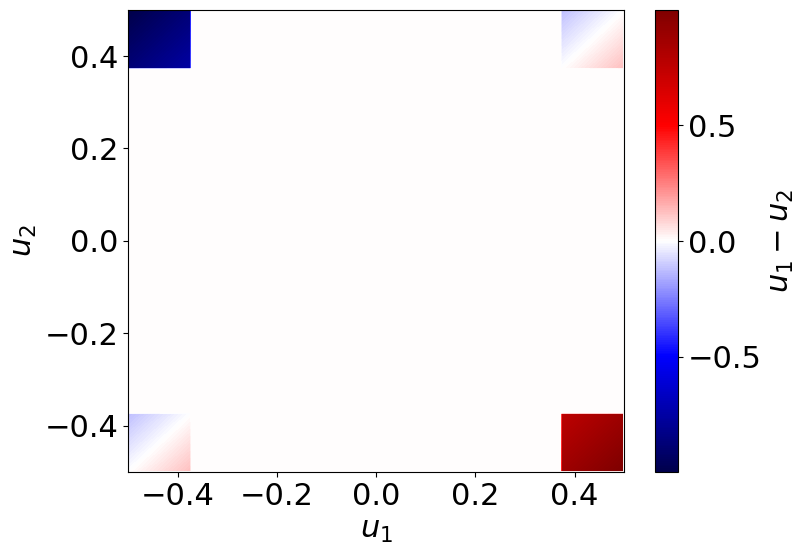

In [4]:
def surface_function(u, v):
    return (u - v)*(rect(u)-rect(u/.75))*(rect(v)-rect(v/.75))

# Define the range for u and v
u_min, u_max = -0.5, 0.5
v_min, v_max = -0.5, 0.5

# Number of points in each dimension
num_points = 500

# Create a grid of u and v values
u = np.linspace(u_min, u_max, num_points)
v = np.linspace(v_min, v_max, num_points)
U, V = np.meshgrid(u, v)



# Compute the function values over the grid
Z = surface_function(U, V)

# Create the density plot
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=(u_min, u_max, v_min, v_max), origin='lower', cmap='seismic', aspect='auto')
plt.colorbar(label=r'$u_1-u_2$')
#plt.title('Density Plot of surface_function(u, v)')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.savefig('Juv2.pdf')


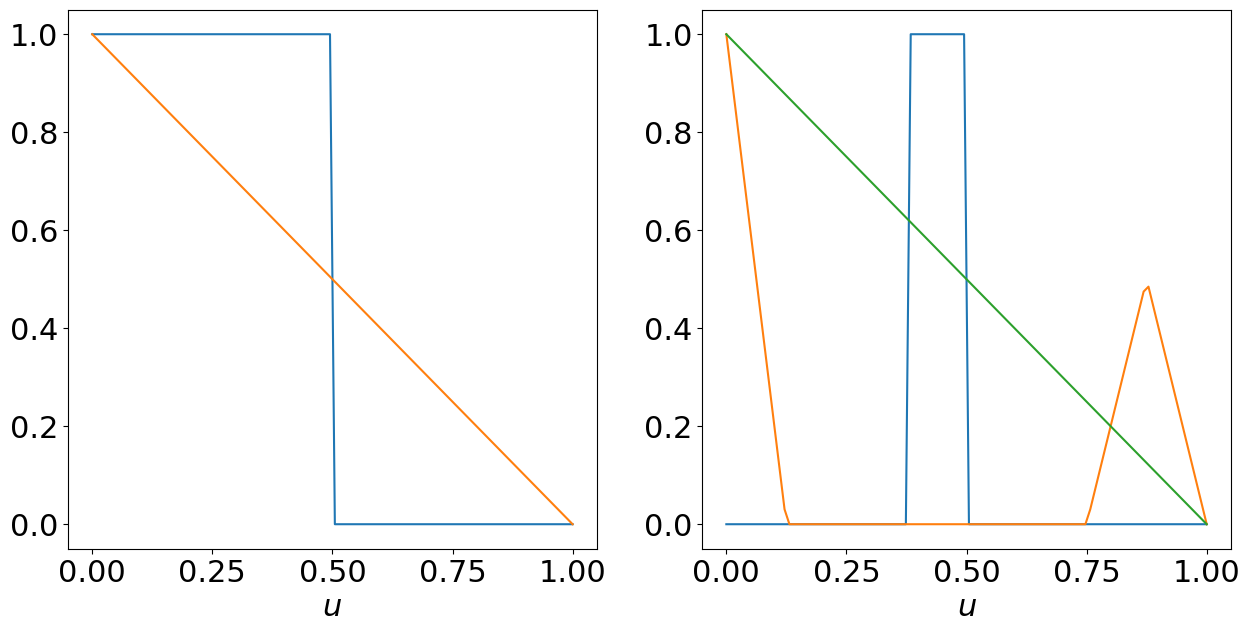

In [5]:
def p(u):
  p=rect(u)
  return p
def otf(u):
  p=convolve_rects(1,1,u)
  return p
u=np.linspace(0,1,100)
plt.subplot(1,2,1)
plt.plot(u,p(u), u,otf(u))
plt.xlabel(r'$u$')
plt.subplot(1,2,2)
w=.75
plt.plot(u,rect(u)-rect(u/w),u,(convolve_rects(1,1,u)+convolve_rects(w,w,u)-2*convolve_rects(1,w,u))/(1-w))
plt.xlabel(r'$u$')
plt.plot(u,otf(u))
plt.savefig('otf1Dannulus.pdf')

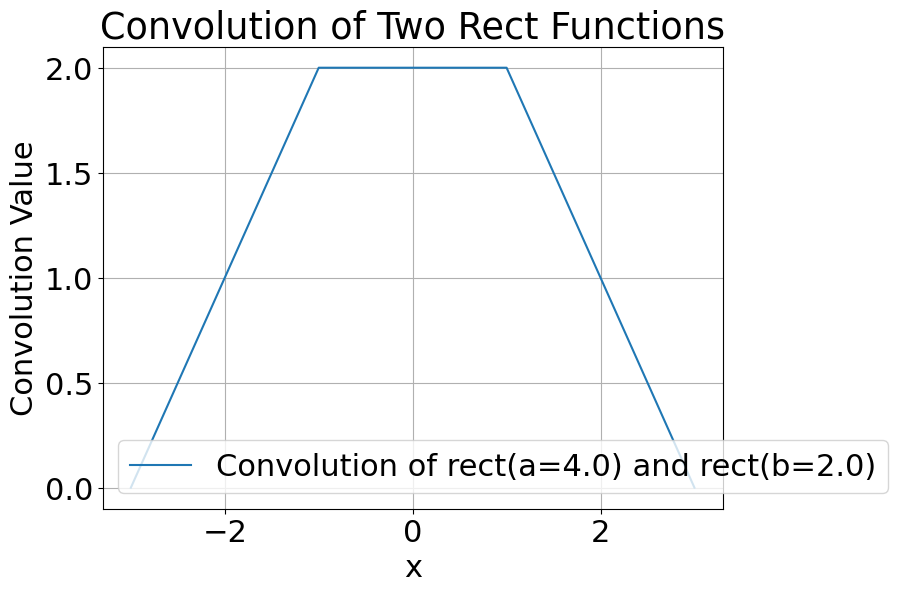

In [ ]:


def rect(x, width):
    """
    Rectangle function centered at zero with given width.
    Returns 1 where |x| <= width/2, else 0.
    """
    return np.where(np.abs(x) <= width / 2, 1.0, 0.0)

def convolve_rects(a, b, x_values):
    """
    Compute the convolution of two rect functions centered at zero with widths a and b.

    Parameters:
    - a: Width of the first rect function.
    - b: Width of the second rect function.
    - x_values: Array of x values where the convolution is evaluated.

    Returns:
    - h_values: The convolution evaluated at x_values.
    """
    # Compute the overlap at each x
    left = np.maximum(-a/2, x_values - b/2)
    right = np.minimum(a/2, x_values + b/2)
    overlap = right - left
    h_values = np.maximum(0, overlap)
    return h_values

# Example usage
if __name__ == "__main__":
    a = 4.0  # Width of the first rect function (e.g., wider rectangle)
    b = 2.0  # Width of the second rect function (e.g., narrower rectangle)

    # Define the range of x values
    x_min = - (a + b) / 2
    x_max = (a + b) / 2
    num_points = 1000
    x_values = np.linspace(x_min, x_max, num_points)

    # Compute the convolution
    h_values = convolve_rects(a, b, x_values)

    # Plot the result
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, h_values, label=f'Convolution of rect(a={a}) and rect(b={b})')
    plt.title('Convolution of Two Rect Functions')
    plt.xlabel('x')
    plt.ylabel('Convolution Value')
    plt.legend()
    plt.grid(True)
    plt.show()
